In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv("stackoverflow_full.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [4]:
df.dtypes 

Unnamed: 0          int64
Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
HaveWorkedWith     object
ComputerSkills      int64
Employed            int64
dtype: object

In [5]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [6]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [7]:
df.select_dtypes(include = 'object').nunique()

Age                   2
Accessibility         2
EdLevel               5
Gender                3
MentalHealth          2
MainBranch            2
Country             172
HaveWorkedWith    69980
dtype: int64

In [8]:
df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

In [9]:
def segment_country(country):
    if country in ['United States of America', 'Canada', 'Mexico', 'United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Oceania'
    else:
        return 'Others'
    
    
    
df["region"] = df["Country"].apply(segment_country)

In [10]:
df["region"].value_counts()

Europe           46430
Others           11220
Asia              9457
South America     4258
Oceania           2097
Name: region, dtype: int64

<class 'pandas.core.series.Series'>


<AxesSubplot:>

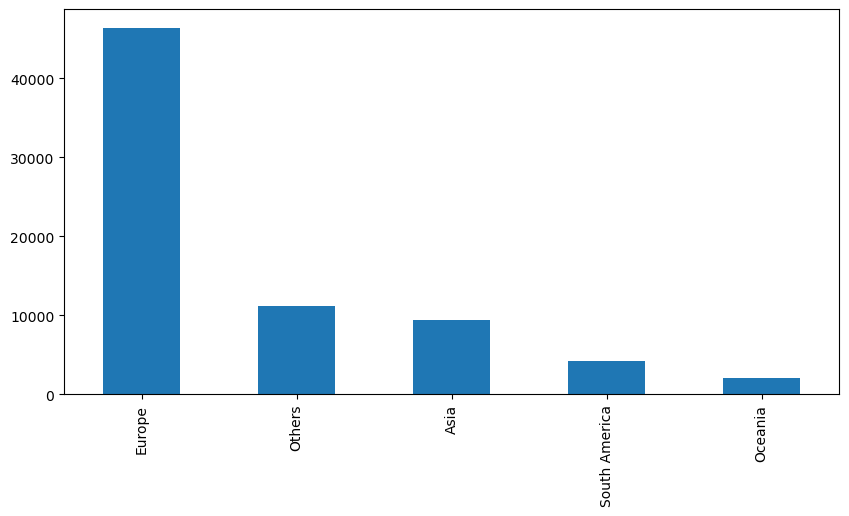

In [11]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
print(type(df["region"].value_counts()))
df["region"].value_counts().plot(kind= "bar")

# EDA 

In [12]:
# get the name of all the columnns with the dtypes object and exluding "Country"
car_var = [var for var in df.select_dtypes(include = "object").columns if var != "Country"]
print(car_var)

['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'HaveWorkedWith', 'region']


NameError: name 'axs' is not defined

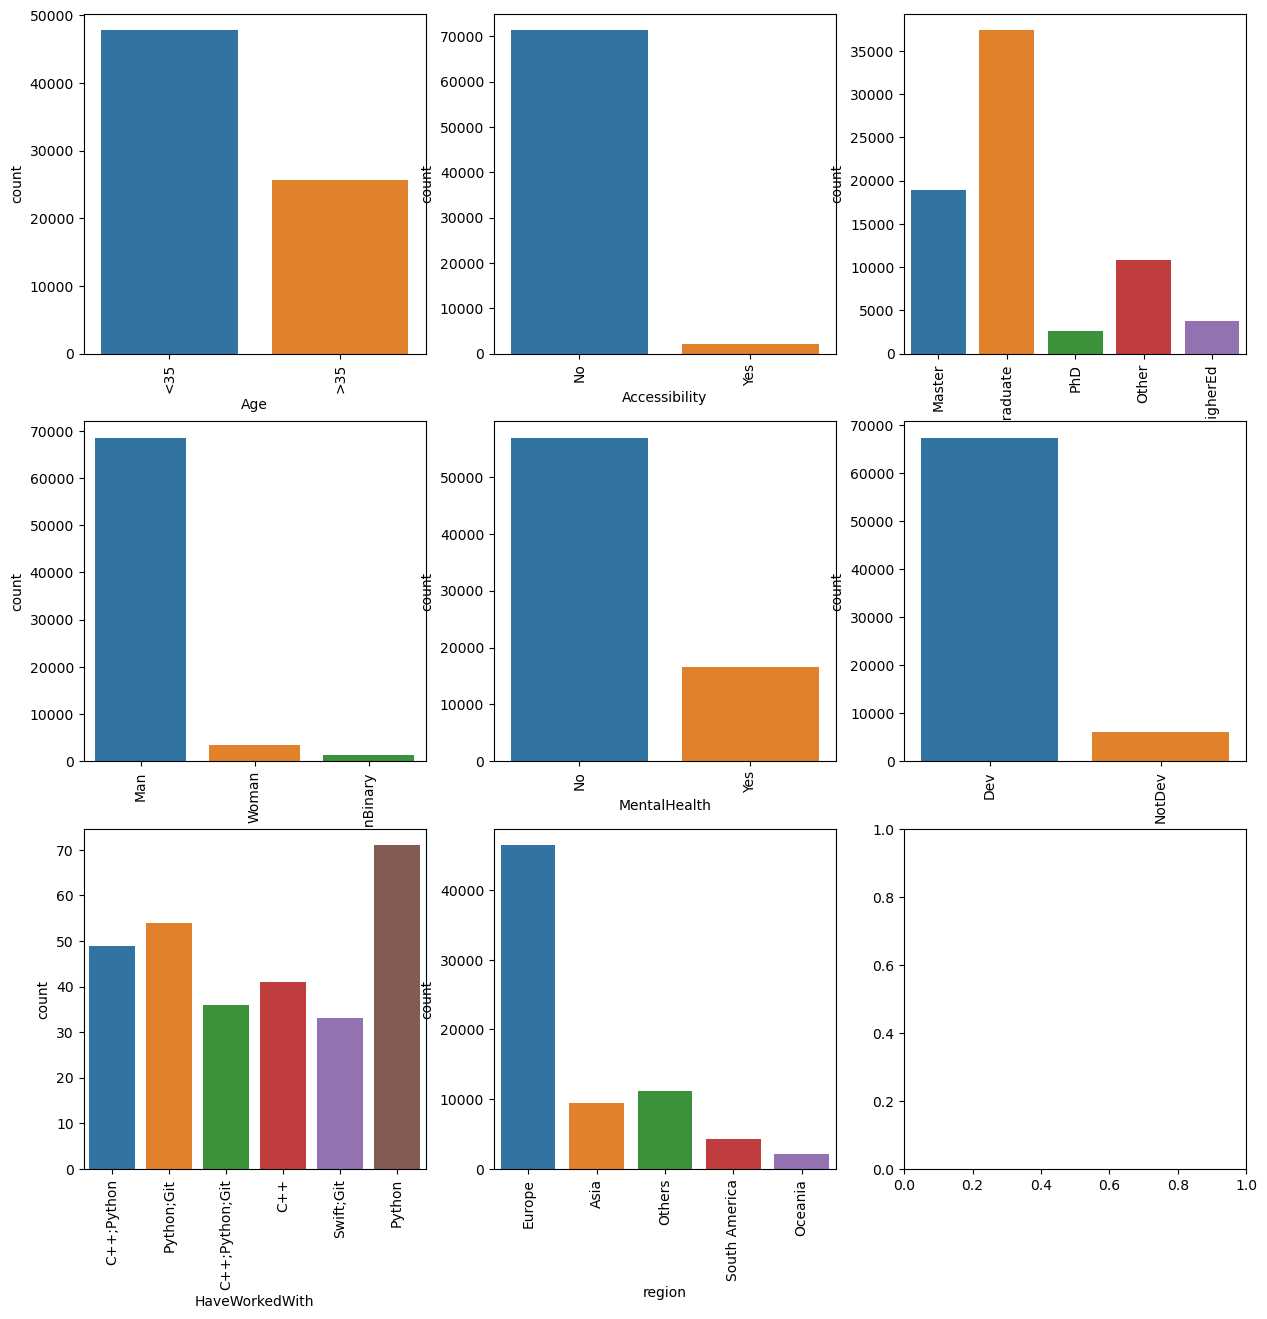

In [13]:
#we will create a figure with 3 columns and we need to figure out the number of rows 
rows  = (len(car_var) +2) // 3 
fig , axis = plt.subplots(nrows=rows, ncols=3 , figsize=(15, 5*rows))
axis = axis.flatten()
#create the count plot for the 6 number of categories in each feature
for i , var in enumerate(car_var):
    t  = df[var].value_counts().nlargest(6).index
    filtered_data = df[df[var].isin(t)]
    sns.countplot(x= var  , data = filtered_data , ax = axis[i])
    axis[i].tick_params(axis = 'x' , rotation = 90)
    
    
    
#delete any extra empty graphs 


# Remove any extra empty subplots if needed
num_cols = len(car_var)
if num_cols < len(axs):
    for i in range(num_cols, len(axis)):
        fig.delaxes(axis[i])

    
#adjust the spaces between the subplots :
fig.tight_layout()

#show plot 
plt.show()
    
    


In [ ]:
#create the count plot for the 6 number of categories in each feature
for i , var in enumerate(car_var):
    t  = df[var].value_counts().nlargest(6).index
    filtered_data = df[df[var].isin(t)]
    sns.countplot(x= var  , data = filtered_data , ax = axis[i])
    plt.show()
    

In [ ]:
for v in df.select_dtypes(include = "object").columns : 
    t = df[v].value_counts()
    print(t)
    print("\n\n\n\n\n")

In [ ]:
list(df["EdLevel"].value_counts().index)

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns) excluding 'Country'
cat_vars = [var for var in df.select_dtypes(include='object').columns if var != 'Country']

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
num_cols = len(cat_vars)
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [ ]:
t = df["Country"].value_counts().nlargest(10).index
tt = df["Country"].value_counts().nlargest(10).values

#get the data where the index in t 
filtred_data = df[df["Country"].isin(t)]
#ploting the horisontal bar plot for the ten most countries in our dataset 
sns.barplot(x=tt , y = t , orient ="h" , palette = "Spectral" )
plt.title("the 10 most  countries requering jobs")
#show the graph 
plt.show()


In [ ]:
t  = df.groupby("Country")["PreviousSalary"].mean().nlargest(10)

In [ ]:
# create the plot for plotting the most 10 best countries with the best salaries 

fig  = plt.figure(figsize = (10,5)) 
sns.barplot(x = t.values , y = t.index , orient = "h" , palette = "viridis")
plt.title("the best 10 countries that gives the heist salary")
plt.xlabel("Country")
plt.ylabel("the Average Salary")
#show the plot
plt.show()

# passing to int and float varaiable : 

In [ ]:
#create a list  of columns with the int / float as dtypes : 
list_n_cat = [v for v in df.select_dtypes(include = ["int", "float"]) if v not in ["Employed" ,"Employment"]]

In [14]:
for one in list_n_cat : 
    print(one)

NameError: name 'list_n_cat' is not defined

In [15]:
#creating a boxplot for each one of those 
cols = len(list_n_cat)
n_rows = (cols + 2) // 3 
fig , axs = plt.subplots(nrows = n_rows , ncols = 3  , figsize = (15, 5*n_rows))
axs = axs.flatten()
#creating the box plots 
for i , var in enumerate(list_n_cat):
    sns.boxplot(x = df[var], ax=axs[i])
    plt.title(var)
    
    
#deteting the empty plots  : 
if cols  < len(axs):
    for i in range(cols , len(axs)):
        fig.delaxes(axs[i])
        
#make the spaces between  the figure : 
fig.tight_layout()
        
        
#show the figures 
plt.show()

NameError: name 'list_n_cat' is not defined

In [16]:
df["Employed"]  = df["Employed"].replace({0:"No" ,1:"Yes"})

In [17]:
df["Employed"].value_counts()

Yes    39392
No     34070
Name: Employed, dtype: int64

In [18]:
df["Employed"].value_counts()

Yes    39392
No     34070
Name: Employed, dtype: int64

In [19]:
df["Employment"].value_counts()

1    64874
0     8588
Name: Employment, dtype: int64

In [20]:
df["Employment"] = df["Employment"].replace({0:"No" ,1:"Yes"})

In [21]:
# create the figure and the axis  : 
#affectiing the number of n_rows and columns within the figure 
n_rows =  (cols + 2) // 3 

fig , axs = plt.subplots(nrows = n_rows  , ncols = 3  , figsize = (15,n_rows*5))
axs = axs.flatten()


for i , v  in enumerate(list_n_cat):
    sns.boxplot(x = df[v] , y = df["Employed"] , ax = axs[i])
    

    
#delete the empty axis 
if cols < len(axs):
    for i in range(cols , len(axs)):
        fig.delaxes(axs[i])

    
#make spaces between the axis 
fig.tight_layout()
    
    
#show the plots : 
plt.show()

NameError: name 'cols' is not defined

In [22]:
# ploting the histograme of all those categorical features 
cols  = df.select_dtypes(include = ["int" , "float"]).columns.tolist()

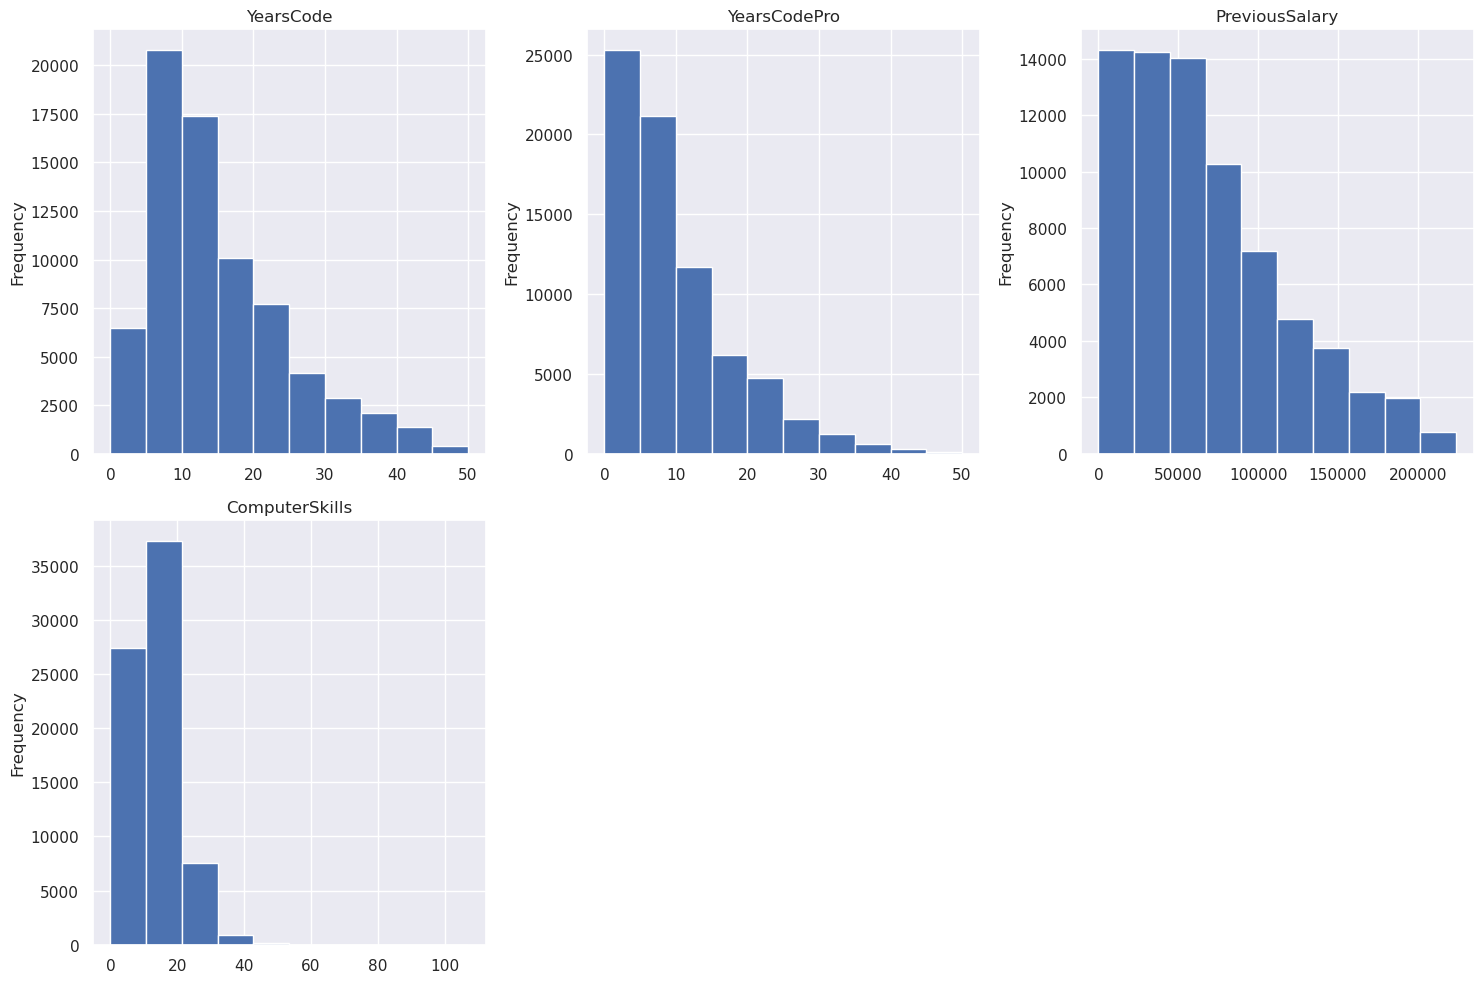

In [23]:
sns.set_theme(color_codes=True)
#knowing the number of columns and rows  
n_rows = (len(cols) + 2) // 3  
fig , axs  = plt.subplots(nrows  = n_rows , ncols = 3  , figsize = (15 , 5*n_rows))
#make the axs as flatten 
axs = axs.flatten()

for i , v in enumerate(cols):
    df[v].plot.hist(ax=axs[i])
    axs[i].set_title(v)
    
#removing the empty axs 
if len(cols) < len(axs):
    for i in range(len(cols), len(axs)):
        fig.delaxes(axs[i])

    
#make the axis equally distance between them 
fig.tight_layout()


#show the figures 
plt.show()

In [24]:
cols

['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']

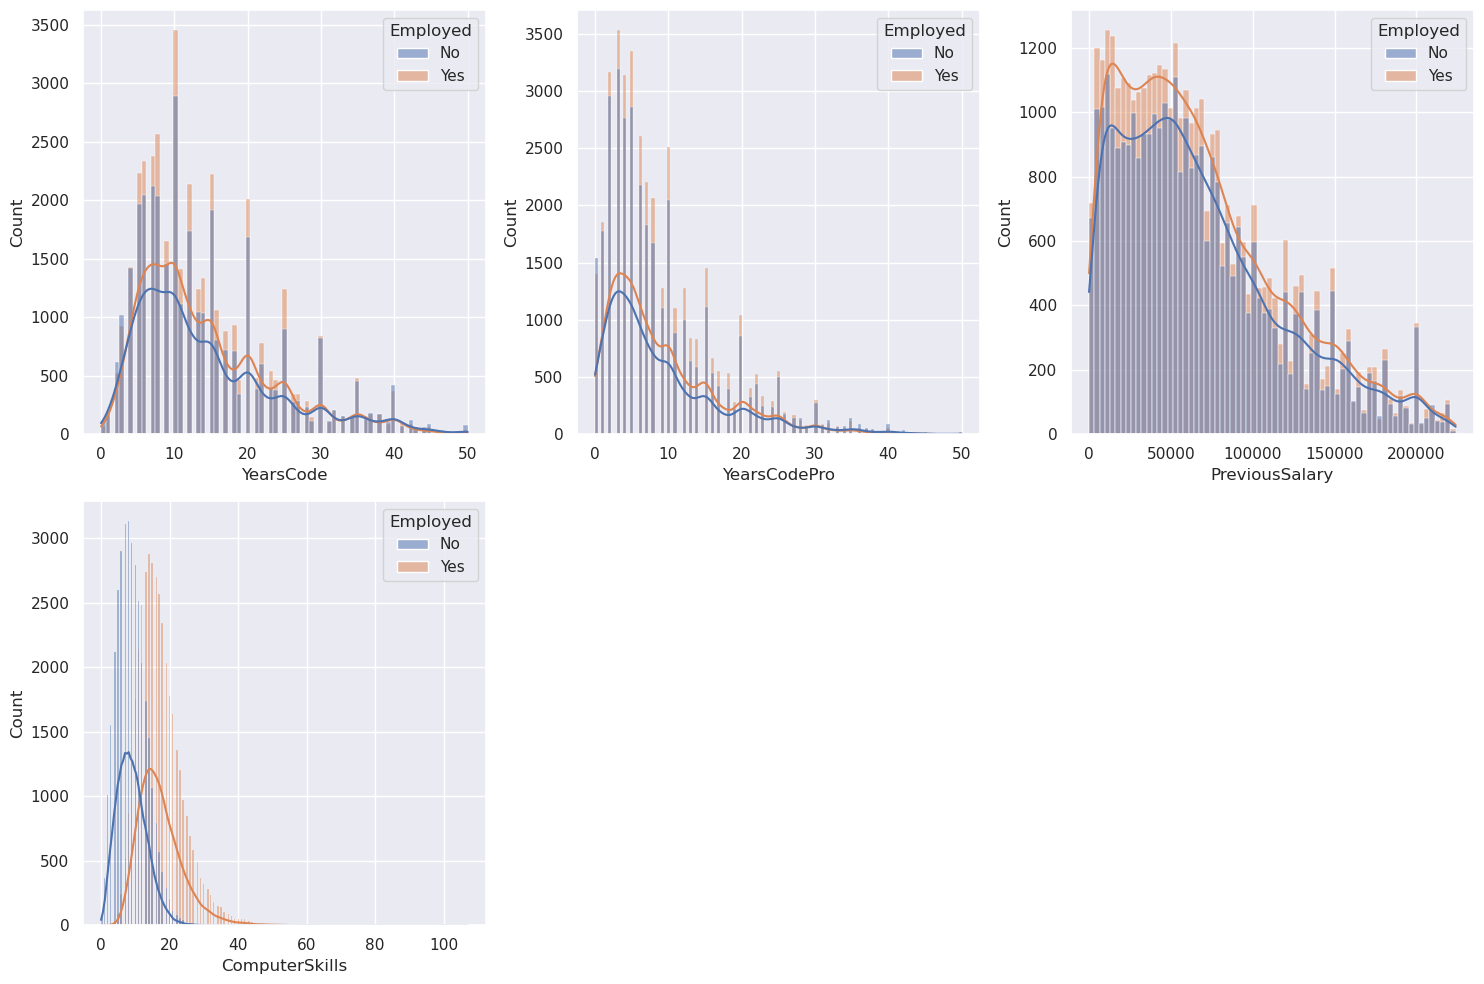

In [25]:
cols  
#affecting the number of rows for our figure 
n_rows  = (len(cols) + 2 ) // 3  
fig , axs =  plt.subplots(nrows = n_rows  ,  ncols = 3 , figsize = (15 , 5*n_rows))
#flattening the axis  
axs  = axs.flatten()

for  i , v in enumerate(cols):
    sns.histplot(data = df  , x = v ,  kde = True  , hue = "Employed",  ax =  axs[i])
    #axs[i].title(v)
    
    
#removing the empty axs 

if len(cols) < len(axs): 
    for i in range(len(cols), len(axs)):
        fig.delaxes(axs[i])

#make the spaces between the axs 
fig.tight_layout()


#showing the plots 
plt.show()


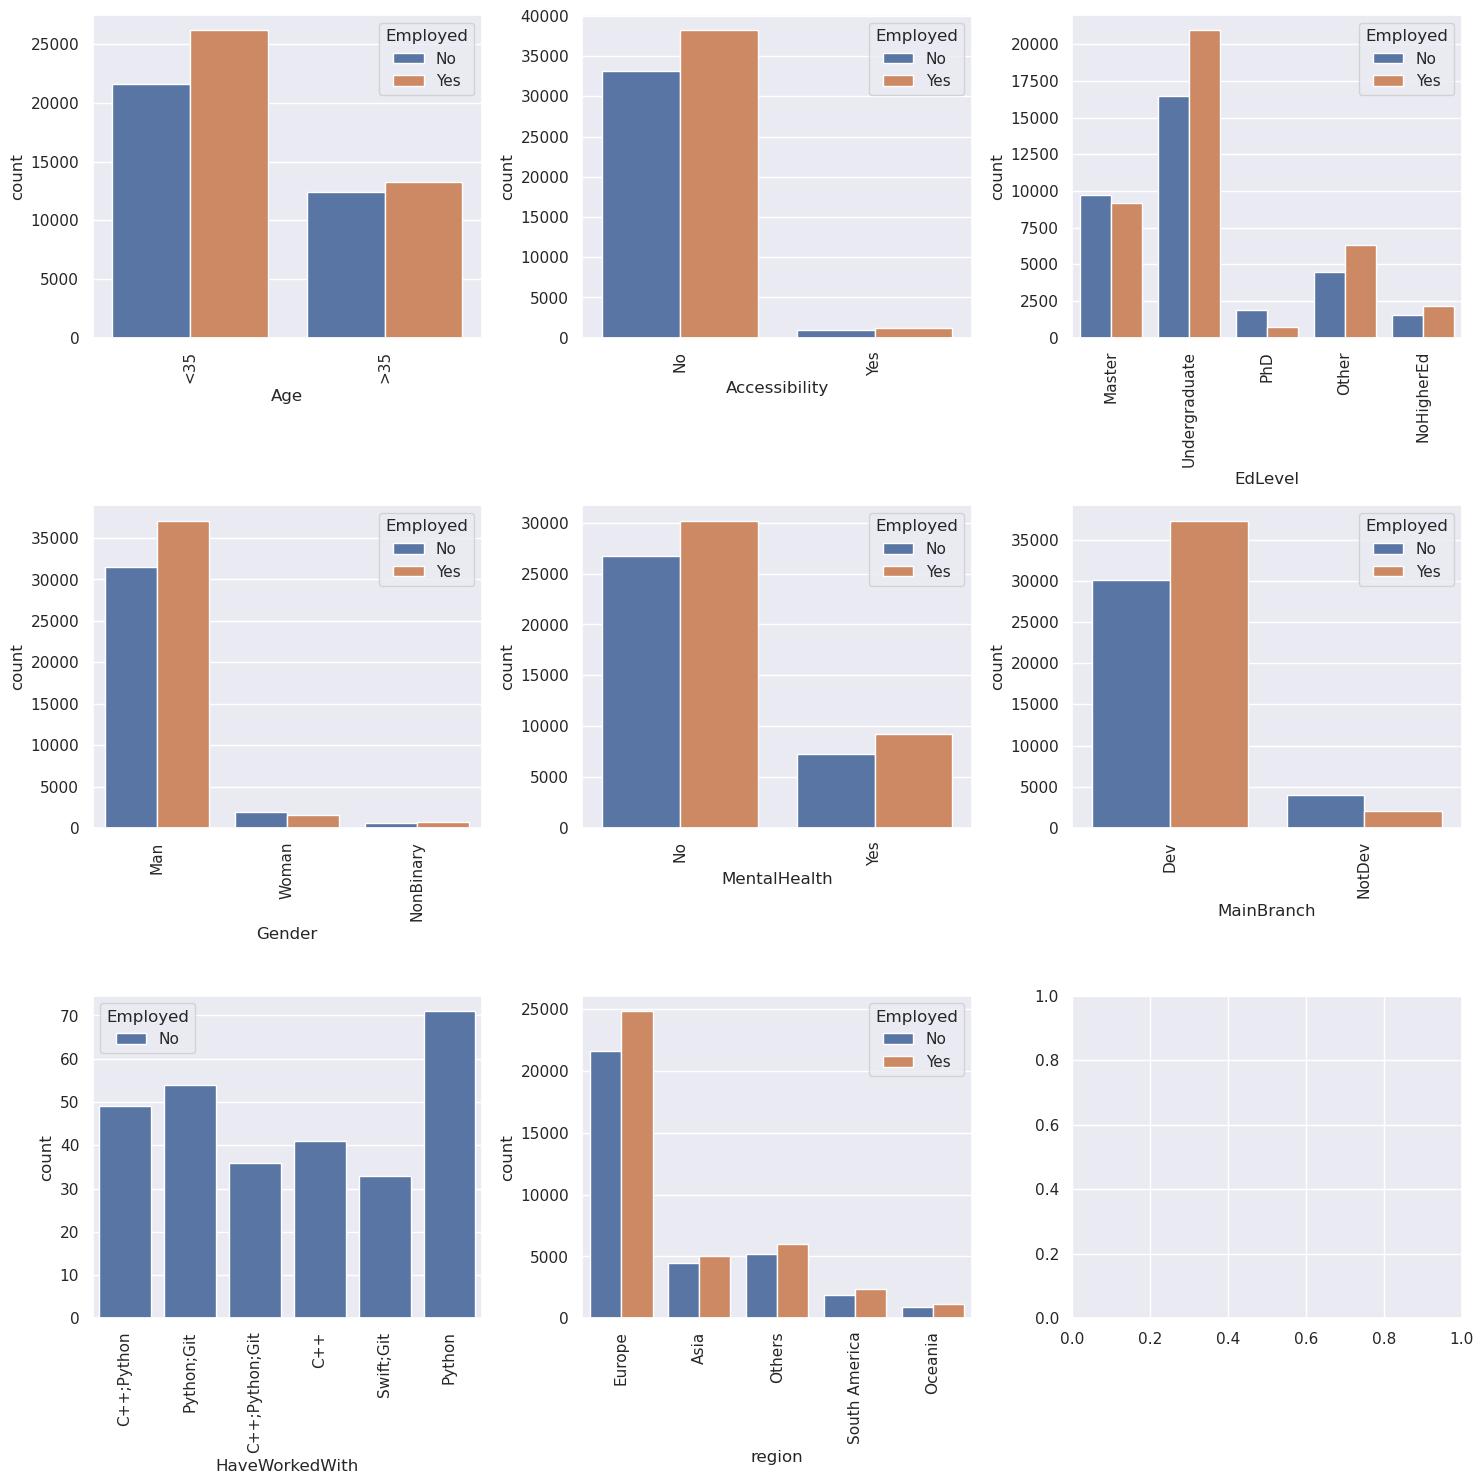

In [26]:
#we will create a figure with 3 columns and we need to figure out the number of rows 
rows  = (len(car_var) +2) // 3 
fig , axis = plt.subplots(nrows=rows, ncols=3 , figsize=(15, 5*rows))
axis = axis.flatten()
#create the count plot for the 6 number of categories in each feature
for i , var in enumerate(car_var):
    t  = df[var].value_counts().nlargest(6).index
    filtered_data = df[df[var].isin(t)]
    sns.countplot(x= var  , data = filtered_data ,hue ="Employed", ax = axis[i])
    axis[i].tick_params(axis = 'x' , rotation = 90)
    
    
    
#delete any extra empty graphs 


# Remove any extra empty subplots if needed
num_cols = len(car_var)
if num_cols < len(axs):
    for i in range(num_cols, len(axis)):
        fig.delaxes(axis[i])

    
#adjust the spaces between the subplots :
fig.tight_layout()

#show plot 
plt.show()
    
    

In [27]:
t= df.select_dtypes(include = "object").columns.tolist()


In [28]:
t 

['Age',
 'Accessibility',
 'EdLevel',
 'Employment',
 'Gender',
 'MentalHealth',
 'MainBranch',
 'Country',
 'HaveWorkedWith',
 'Employed',
 'region']

In [29]:
t.remove('Employed')

In [30]:
t

['Age',
 'Accessibility',
 'EdLevel',
 'Employment',
 'Gender',
 'MentalHealth',
 'MainBranch',
 'Country',
 'HaveWorkedWith',
 'region']

In [31]:
t.remove("HaveWorkedWith")

In [32]:
t

['Age',
 'Accessibility',
 'EdLevel',
 'Employment',
 'Gender',
 'MentalHealth',
 'MainBranch',
 'Country',
 'region']

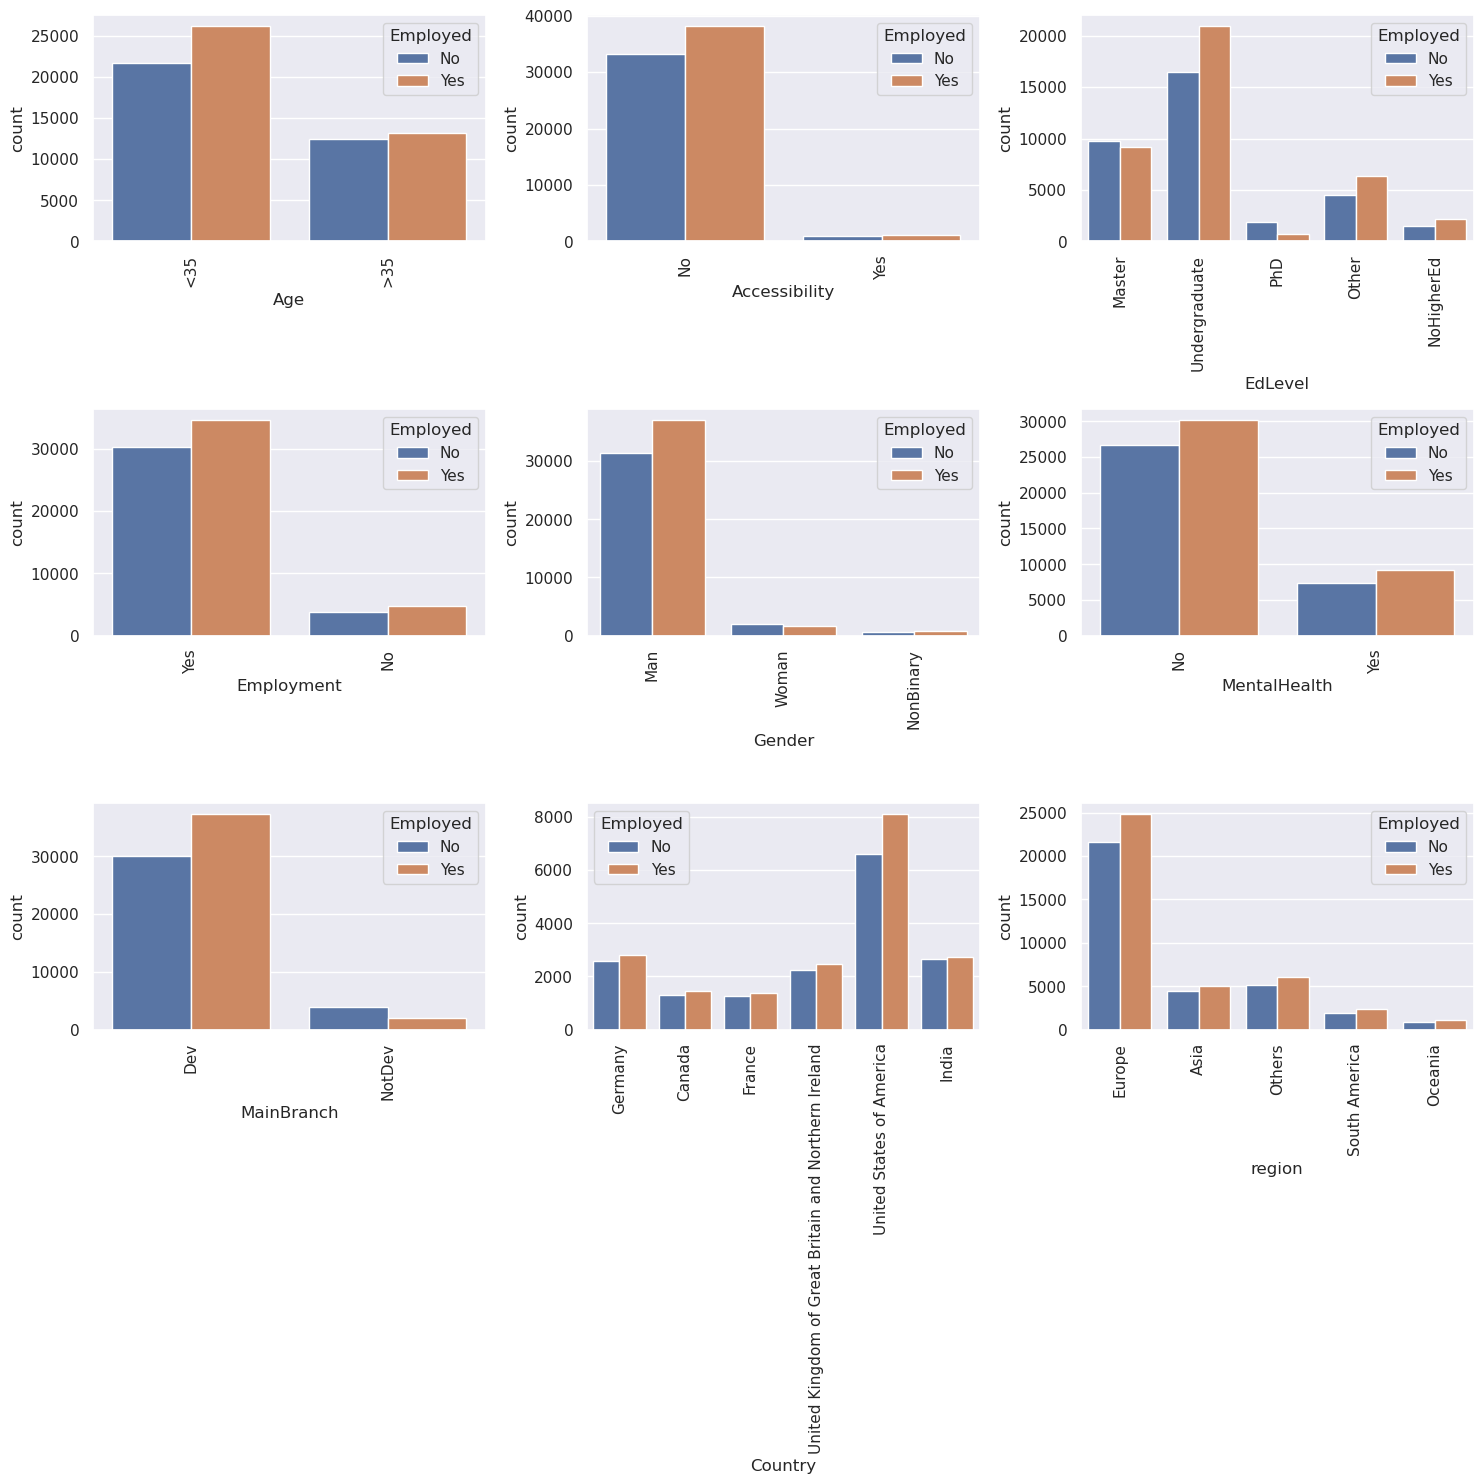

In [33]:
#we will create a figure with 3 columns and we need to figure out the number of rows 
rows  = (len(t) +2) // 3 
fig , axis = plt.subplots(nrows=rows, ncols=3 , figsize=(15, 5*rows))
axis = axis.flatten()
#create the count plot for the 6 number of categories in each feature
for i , var in enumerate(t):
    tt  = df[var].value_counts().nlargest(6).index
    filtered_data = df[df[var].isin(tt)]
    sns.countplot(x= var  , data = filtered_data ,hue ="Employed", ax = axis[i])
    axis[i].tick_params(axis = 'x' , rotation = 90)
    
    
    
#delete any extra empty graphs 


# Remove any extra empty subplots if needed
num_cols = len(t)
if num_cols < len(axs):
    for i in range(num_cols, len(axis)):
        fig.delaxes(axis[i])

    
#adjust the spaces between the subplots :
fig.tight_layout()

#show plot 
plt.show()

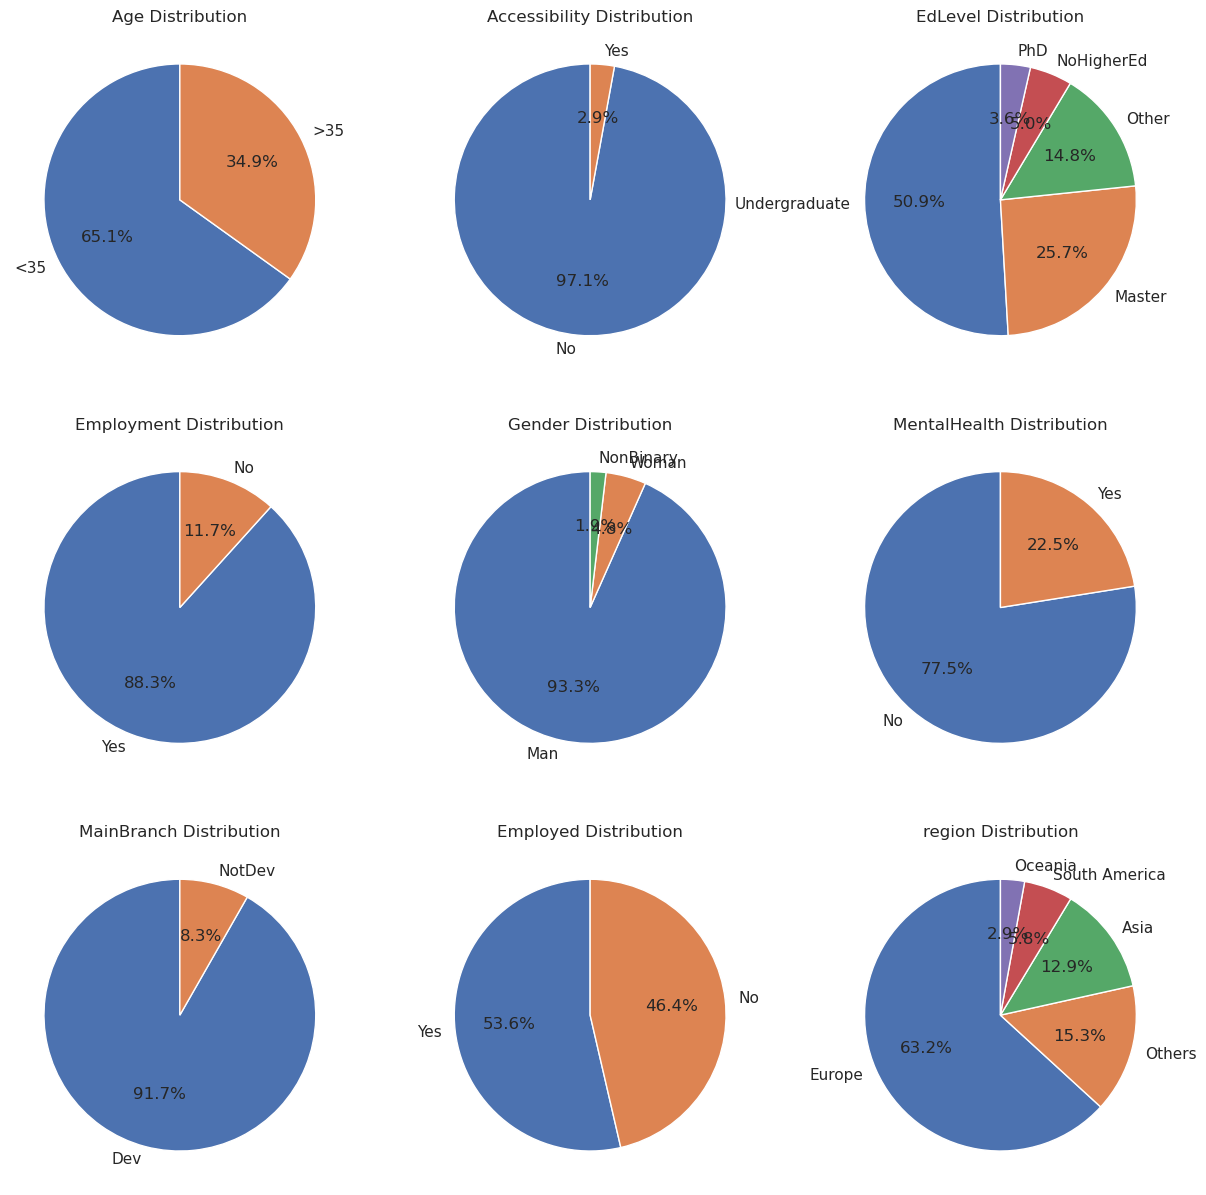

In [34]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'Country' and df[col].dtype == 'object']
cat_cols.remove("HaveWorkedWith")

#know the number of rows and columns in the figure 
n_rows = (len(cat_cols) + 2) // 3 
fig , axs = plt.subplots(nrows = n_rows , ncols = 3,figsize =(15,5*n_rows))
axs  = axs.flatten()





for i, v in enumerate(cat_cols):
    count_data = df[v].value_counts()
    if len(count_data) > max_categories : 
        counted_data = count_data[:max_categories]
        other_data = pd.Series(count_data[max_categories:].sum() , index = ["Other"])
        count_data = counted_data.append(other_data)
    #end the if statement here 
    #create the pie chart 
    axs[i].pie(count_data.values , labels = count_data.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f"{v} Distribution")

    
    
    
    
    
plt.show()

# preproressing and the cheking the data 

In [35]:
#cheking the missing values :
df.isnull().sum()

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
region             0
dtype: int64

In [36]:
#we should drop have worked with it generate only the theck : 
df.drop(columns = ["HaveWorkedWith"] , inplace = True )

In [37]:
df.isnull().sum()

Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
YearsCodePro      0
Country           0
PreviousSalary    0
ComputerSkills    0
Employed          0
region            0
dtype: int64

In [41]:
df.select_dtypes(include = "object").nunique()


Age                2
Accessibility      2
EdLevel            5
Employment         2
Gender             3
MentalHealth       2
MainBranch         2
Country          172
Employed           2
region             5
dtype: int64

In [42]:
# droping the Country columns because while we doing the label encoding it give so many  more features : 
df.drop(columns = ["Country"] , inplace = True )

In [46]:
dtt= df.select_dtypes(include = "object")
#unique only for series : 
dtt.nunique()

Age              2
Accessibility    2
EdLevel          5
Employment       2
Gender           3
MentalHealth     2
MainBranch       2
Employed         2
region           5
dtype: int64

In [47]:
#create a list of the columns that has the type object : 
my_List = df.select_dtypes(include = "object").columns.tolist()

In [48]:
my_List

['Age',
 'Accessibility',
 'EdLevel',
 'Employment',
 'Gender',
 'MentalHealth',
 'MainBranch',
 'Employed',
 'region']

In [50]:
for col in my_List : 
    print(f"{col} has {df[col].unique()}")


Age has ['<35' '>35']
Accessibility has ['No' 'Yes']
EdLevel has ['Master' 'Undergraduate' 'PhD' 'Other' 'NoHigherEd']
Employment has ['Yes' 'No']
Gender has ['Man' 'Woman' 'NonBinary']
MentalHealth has ['No' 'Yes']
MainBranch has ['Dev' 'NotDev']
Employed has ['No' 'Yes']
region has ['Europe' 'Asia' 'Others' 'South America' 'Oceania']


In [57]:
# do the label encoding for each one of those columns : 
from sklearn.preprocessing  import LabelEncoder
#create a list of the columns of the object as dtypes : 
mylist  = df.select_dtypes(include = "object").columns.tolist()
print(mylist)
for col  in mylist : 
    #instanciate the labelencoder  
    le  = LabelEncoder()
    #fitting the unique values to the label encoder 
    le.fit(df[col].unique())
    #transform the data throw the our label encoder 
    df[col] = le.transform(df[col])
    
    #print for each columnns the number of the unique labels afer transfroming it throw the label encoding 
    print(f"{col} ## has now the values ## :{df[col].unique()} ")
    
    
df.head()
    


[]


,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,region
0,0,0,0,1,0,0,0,7,4,51552.0,4,0,1
1,0,0,4,1,0,0,0,12,5,46482.0,12,1,1
2,0,0,0,1,0,0,0,15,6,77290.0,7,0,1
3,0,0,4,1,0,0,0,9,6,46135.0,13,0,1
4,1,0,3,0,0,0,1,40,30,160932.0,2,0,0


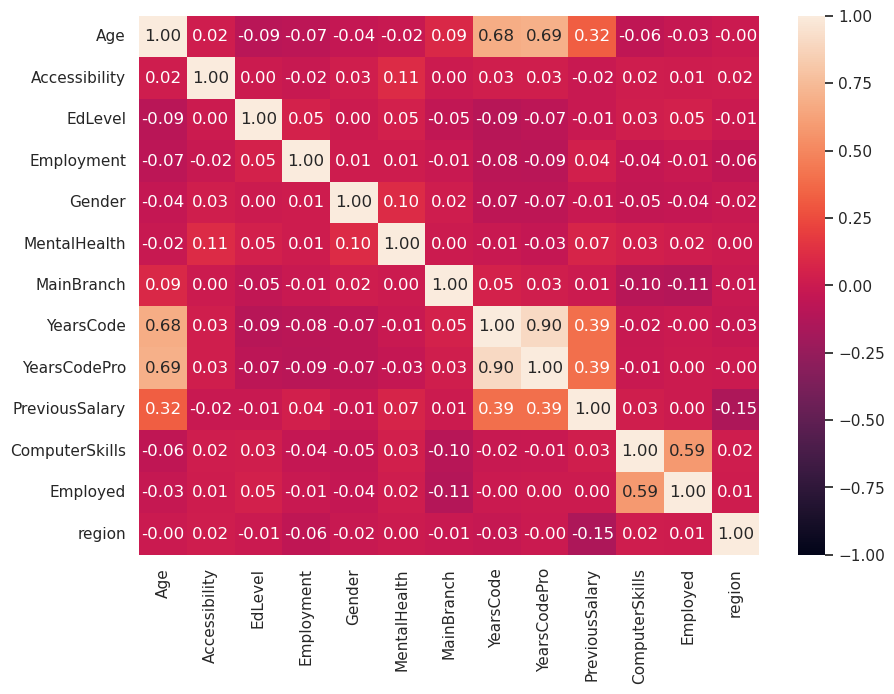

In [63]:
# create a heatmap in order to dispay the colleration of our features : 
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),  vmin=-1, vmax=1 , annot= True , fmt= '0.2f' )
plt.show()


In [64]:
# as we see from the heat map we have a fort colleration between the YearsCode and the yearsCodePro

In [65]:
#delete the YearsCodePro 
df.drop(columns = ["YearsCodePro"] , inplace = True )

In [66]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,region
0,0,0,0,1,0,0,0,7,51552.0,4,0,1
1,0,0,4,1,0,0,0,12,46482.0,12,1,1
2,0,0,0,1,0,0,0,15,77290.0,7,0,1
3,0,0,4,1,0,0,0,9,46135.0,13,0,1
4,1,0,3,0,0,0,1,40,160932.0,2,0,0


# Train test split   

In [71]:
from sklearn.model_selection import train_test_split 
#make the data ready whithout our target variable 
X  = df.drop("Employed" , axis = 1 )
y  = df["Employed"]
X_train , X_test , y_train  , y_test = train_test_split(X , y  , test_size = 0.2 , random_state=0)


In [92]:
#removing the outliers based on the Zscore from the train data  
from  scipy import stats 
#list of the columns that we want to remove the outliers : 
l = ['YearsCode', 'PreviousSalar y', 'ComputerSkills']
sz = np.abs(stats.zscore(X_train[l]))
#the threshold 
threshold = 3 
outlier_indices  = np.where(sz >threshold )[0]
#remove the data of the outliers from the X_train and y_train where the indecies in the outliers_indices 
X_train  = X_train.drop(X_train.index[outlier_indices] )
y_train = y_train.drop(y_train.index[outlier_indices ])



In [96]:
# Decision Tree clasifier :
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

gridsearch = GridSearchCV(dt ,param_grid  ,  cv=5)
gridsearch.fit(X_train , y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]})

In [97]:
gridsearch.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0}

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [99]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 78.04 %


In [100]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.780371605526441
Precision Score :  0.7803716055264411
Recall Score :  0.7803716055264411
Jaccard Score :  0.63984375
Log Loss :  7.916209724813248


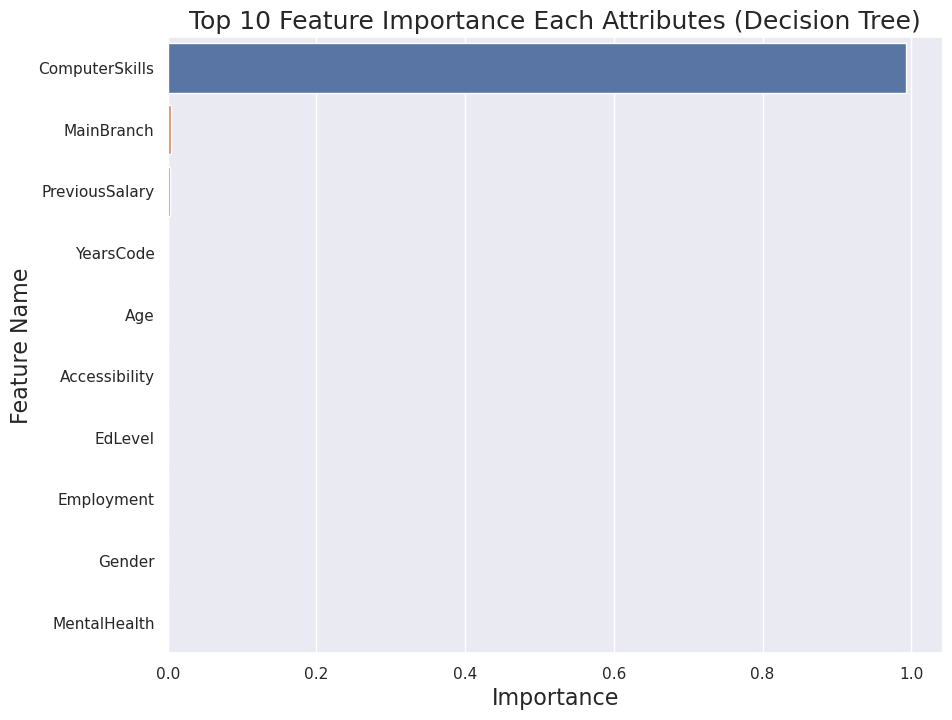

In [101]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

ModuleNotFoundError: No module named 'shap'